# Actividad de Consolidacion 6

## 1. Carga y exploración de datos

Carga de los datos

In [1]:
import pandas as pd

df = pd.read_csv('cambio_climatico_agricultura.csv')
df

,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,Alemania,10.5,-5,2,950000
1,Argentina,17.8,-10,5,650000
2,Australia,22.3,-15,8,400000
3,Brasil,25.1,-8,6,900000
4,Canadá,6.2,-2,1,850000
5,Chile,15.4,-12,7,500000
6,España,18.2,-9,6,600000
7,Estados Unidos,12.8,-4,3,1200000
8,Francia,11.5,-6,2,980000
9,Italia,13.4,-7,4,700000


Exploracion de los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  23 non-null     object 
 1   Temperatura_promedio  23 non-null     float64
 2   Cambio_lluvias        23 non-null     int64  
 3   Frecuencia_sequías    23 non-null     int64  
 4   Producción_alimentos  23 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ KB


EDA

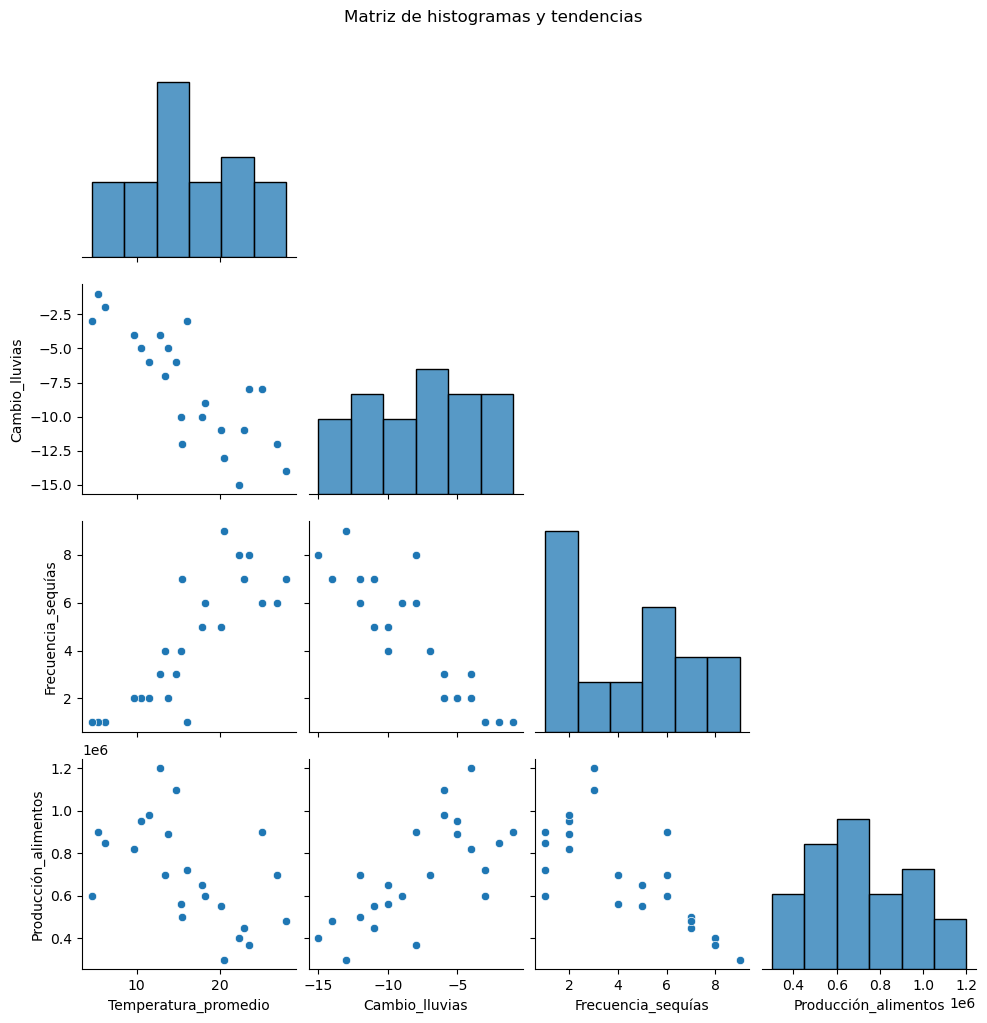

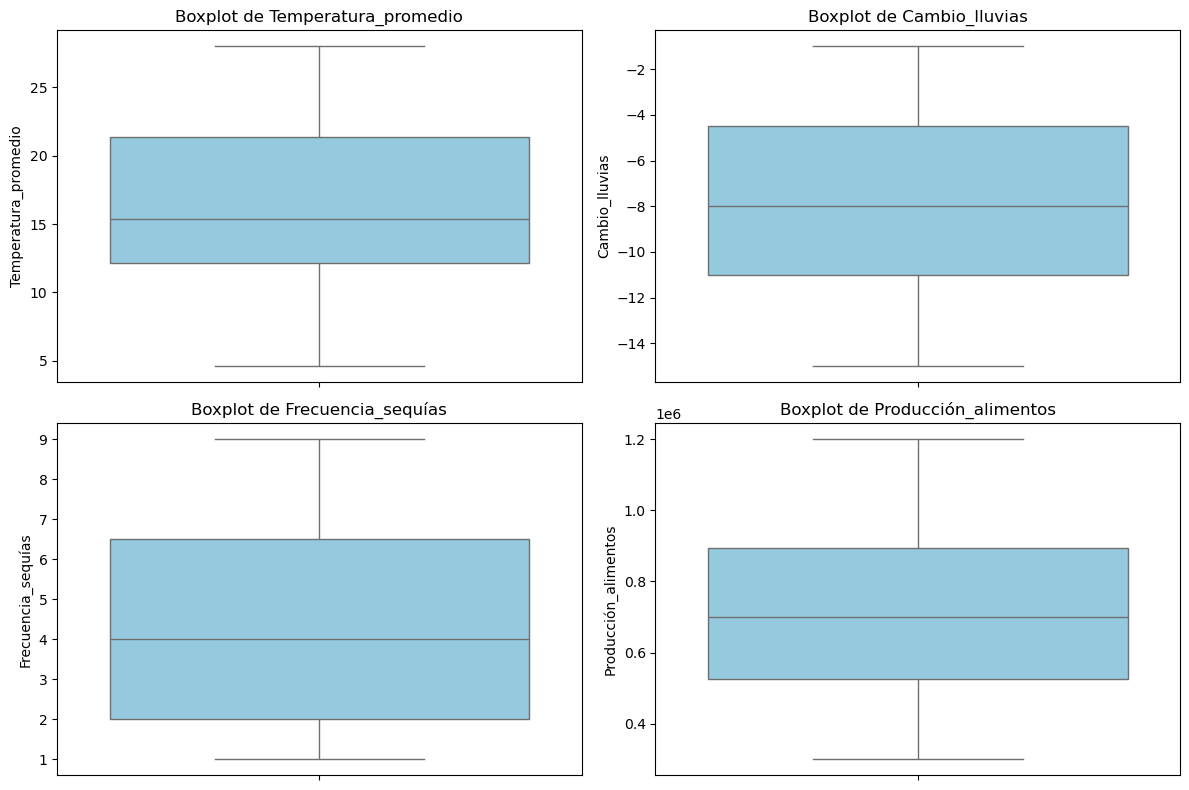

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

var_num = df.select_dtypes(include = 'number') 

sns.pairplot(var_num, diag_kind = 'hist', corner = True)
plt.suptitle('Matriz de histogramas y tendencias', y = 1.02)
plt.show()

fig, axes = plt.subplots(2, 2, figsize = (12, 8))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.boxplot(y = df[var], ax = axes[i], color = 'skyblue')
    axes[i].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

Medias centrales

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperatura_promedio,23.0,16.291304,6.692256,4.6,12.15,15.4,21.4,28.0
Cambio_lluvias,23.0,-7.782609,4.055933,-15.0,-11.00,-8.0,-4.5,-1.0
Frecuencia_sequías,23.0,4.347826,2.604344,1.0,2.00,4.0,6.5,9.0
Producción_alimentos,23.0,703043.478261,241066.471079,300000.0,525000.00,700000.0,895000.0,1200000.0


## 2. Preprocesamiento y escalamiento de datos

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['País', 'Producción_alimentos'])
y = df['Producción_alimentos']

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## 3. Aplicación de modelos de aprendizaje supervisado

Modelo de regresion

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

modelos = {
    'Regresion lineal': LinearRegression(),
    'Arbol de decisiones': DecisionTreeRegressor(random_state = 42),
    'Random forest': RandomForestRegressor(random_state = 42)
}

resultados = {}

for name, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

df_resultados = pd.DataFrame(resultados).T
df_resultados

,MAE,MSE,R2
Regresion lineal,178041.141894,4.369821e+10,-0.262079
Arbol de decisiones,210000.000000,7.234000e+10,-1.089302
Random forest,160840.000000,3.473347e+10,-0.003162


Nueva variable

In [7]:
df['Impacto_climatico'] = pd.qcut(df['Producción_alimentos'], q = 3, labels = ['Bajo', 'Medio', 'Alto'])

Preparacion de los datos para los modelos de clasificacion

In [8]:
X = df.drop(columns = ['País', 'Producción_alimentos', 'Impacto_climatico'])
y = df['Impacto_climatico']

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, stratify = y, random_state = 42) 

Modelos de clasificacion


Modelo: KNN

Matriz de confusion

[[2 0 0]
 [0 2 0]
 [1 0 0]]

Reporte

              precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5

ROC-AUC: 0.2639

Modelo: Arbol de decision

Matriz de confusion

[[1 0 1]
 [1 1 0]
 [1 0 0]]

Reporte

              precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg       0.53      0.40      0.43         5

ROC-AUC: 0.5139

Modelo: SVM

Matriz de confusion

[[2 0 0]
 [

C:\Users\matia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matia\anaconda3\Lib\site-packag

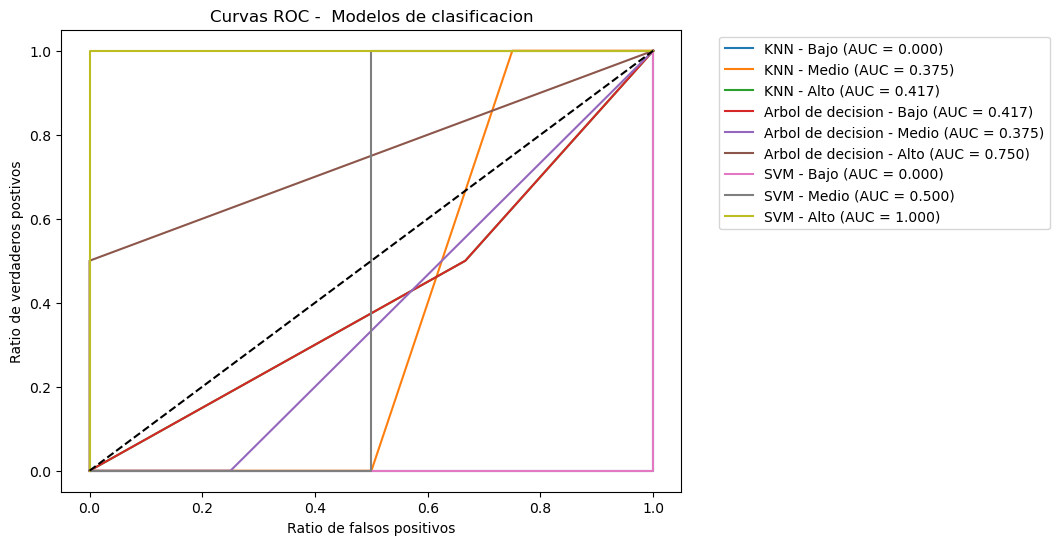

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

models = {
    'KNN': KNeighborsClassifier(),
    'Arbol de decision': DecisionTreeClassifier(random_state = 42),
    'SVM': SVC(probability = True, random_state = 42)
}

plt.figure(figsize = (8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    print(f'\nModelo: {name}')
    print('\nMatriz de confusion\n')
    print(confusion_matrix(y_test, y_pred))
    print('\nReporte\n')
    print(classification_report(y_test, y_pred))

    y_test_bin = pd.get_dummies(y_test, drop_first = False)
    roc_auc = roc_auc_score(y_test_bin, y_pred_proba)
    print(f'ROC-AUC: {roc_auc:.4f}')
    
    for i, clase in enumerate(y_test_bin.columns):
        fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_pred_proba[:, i])
        roc_auc_ind = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = f'{name} - {clase} (AUC = {roc_auc_ind:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos postivos')
plt.title('Curvas ROC -  Modelos de clasificacion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 4. Optimización de modelos 

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Datos regresión
X_reg = df.drop(columns=['País', 'Producción_alimentos', 'Impacto_climatico'])
y_reg = df['Producción_alimentos']

# Reescalado y división
X_reg_scaled = ss.fit_transform(X_reg)
X_reg_scaled = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

# Regresion
# Grillas

param_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, scoring='r2')
grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, scoring='r2')

grid_ridge.fit(Xr_train, yr_train)
grid_lasso.fit(Xr_train, yr_train)

for name, model in {
    'Ridge': grid_ridge,
    'Lasso': grid_lasso
}.items():
    y_pred = model.predict(Xr_test)
    mae = mean_absolute_error(yr_test, y_pred)
    mse = mean_squared_error(yr_test, y_pred)
    r2 = r2_score(yr_test, y_pred)
    print(f"\n{name} (mejor alpha: {model.best_params_['alpha']})")
    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | R2: {r2:.4f}")

# Clasificacion
# Grillas

param_knn = {'n_neighbors': [3, 5, 7, 9],
             'weights': ['uniform', 'distance']}
param_tree = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10]}
param_svc = {'C': [0.1, 1, 10],
             'kernel': ['linear', 'rbf'],
             'gamma': ['scale', 'auto']}

grids_classif = {
    'KNN': GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy'),
    'Arbol de decision': GridSearchCV(DecisionTreeClassifier(random_state=42), param_tree, cv=5, scoring='accuracy'),
    'SVM': GridSearchCV(SVC(probability=True, random_state=42), param_svc, cv=5, scoring='accuracy')
}

for name, grid in grids_classif.items():
    grid.fit(X_train, y_train)
    print(f"\nModelo: {name}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Mejor exactitud (CV): {grid.best_score_:.4f}")
    
    y_pred = grid.predict(X_test)
    print("\nMatriz de confusión\n", confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación\n", classification_report(y_test, y_pred))
    
    y_test_bin = pd.get_dummies(y_test, drop_first=False)
    y_pred_proba = grid.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_proba)
    print(f"ROC-AUC (macro): {roc_auc:.4f}")



Ridge (mejor alpha: 1)
MAE: 181808.3334 | MSE: 45546968839.6771 | R2: -0.3155

Lasso (mejor alpha: 100)
MAE: 178071.7615 | MSE: 43738458932.8088 | R2: -0.2632

Modelo: KNN
Mejores parámetros: {'n_neighbors': 5, 'weights': 'uniform'}
Mejor exactitud (CV): 0.6000

Matriz de confusión
 [[2 0 0]
 [0 2 0]
 [1 0 0]]

Reporte de clasificación
               precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5

ROC-AUC (macro): 0.2639


C:\Users\matia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Modelo: Arbol de decision
Mejores parámetros: {'max_depth': 3, 'min_samples_split': 2}
Mejor exactitud (CV): 0.5500

Matriz de confusión
 [[1 0 1]
 [1 1 0]
 [1 0 0]]

Reporte de clasificación
               precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg       0.53      0.40      0.43         5

ROC-AUC (macro): 0.5139

Modelo: SVM
Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor exactitud (CV): 0.5500

Matriz de confusión
 [[2 0 0]
 [0 1 1]
 [0 0 1]]

Reporte de clasificación
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.50      1.00      0.67         

## 5. Análisis de resultados y conclusiones

Los metodos de clasificacion, en especial SVM, presenta los mejores matrices de confusion y valores en ROC-AUC.